In [61]:
# !pip install jieba
# !pip install seaborn
# !pip install pyecharts
# !pip install pillow
# !pip install wordcloud
# !pip install numpy
# !pip install scipy
# !pip install imageio
# !pip install pyecharts_snapshot
# !pip install Ipython

In [62]:
import jieba
import pyecharts
import matplotlib
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from pyecharts import Bar,configure,online
from imageio import imread 
import matplotlib.pyplot as plt 
from IPython.display import IFrame 
from wordcloud import WordCloud, ImageColorGenerator  # 词云库


In [63]:
df = pd.read_csv('jay.csv')

In [64]:
#定义切分歌词函数，去stopwords
def cut_lyrics(df):
    all_lyrics = df.歌词.tolist()
    one_lyrics = ''
    for lyrics in all_lyrics :
        lyrics_list =  lyrics.replace("\t","").split('\n\n')
        for i in range(len(lyrics_list)-1):
            one_lyrics += lyrics_list[i].replace("\n","").lower()
    #print(one_lyrics)
    words = jieba.cut(one_lyrics)
    #set stopwords
    filepath = 'stopwords.txt'
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]   
    stopwords.extend(['oh','hey','go','ya','我会','不到','真的','公公','想要','混音','不用','录音师'])
    #remove stopwords
    processed_word_list = [] 
    for word in words:
        if word not in stopwords and len(word)>1: #remove single word
            processed_word_list.append(word)
    return processed_word_list



## Headshot word cloud of Jay Chou's image made with high frequency words in his lyrics

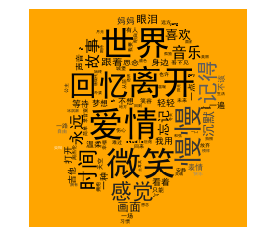

In [68]:
#定义词云函数
def word_cloud(processed_word_list, rank=100):
    word_count100 = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[:rank]
    word_count100_dict = word_count100.to_dict()
    result = " ".join(word_count100_dict)  
    image = imread("jay.jpg")
    wc = WordCloud(
        font_path="simhei.ttf",
        background_color='orange',   #背景颜色
        max_font_size=35,   #最大字号
        mask=image  # 词云形状
    )
    wc.generate(result)
    image_color = ImageColorGenerator(image)
    wc.recolor(color_func=image_color)
    wc.to_file("jay_worldcloud.png")
    plt.figure("jay")
    # 以图片的形式显示词云
    plt.imshow(wc)
    # 关闭图像坐标系 不显示坐标轴
    plt.axis("off")
    plt.show()
    
processed_word_list = cut_lyrics(df)
word_cloud(processed_word_list)



## 1.What is the most frequent word in Jay Chou's lyrics?

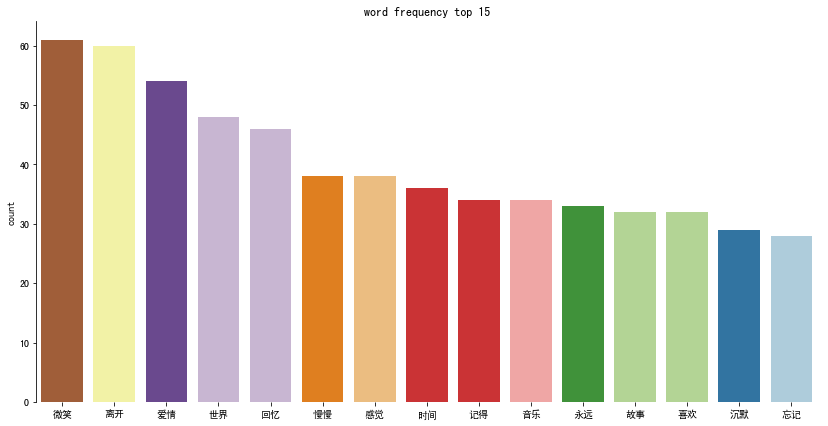

In [66]:
def word_count_bar(inputs):
    fig = plt.figure(figsize=(14,7))  
    x =inputs.index.tolist()  
    y = inputs.values.tolist() 
    sns.barplot(x, y, palette="Paired_r")  
    plt.title('word frequency top 15')  
    plt.ylabel('count')  
    sns.despine(bottom=True)  
    plt.savefig('jay_word_count_bar.png',dpi=400)
    plt.show() 
word_count = pd.Series(processed_word_list).value_counts().sort_values(ascending=False)[:15]
word_count_bar(word_count)



## 2.Who is the most commonly used lyricist for Jay Chou’s songs?

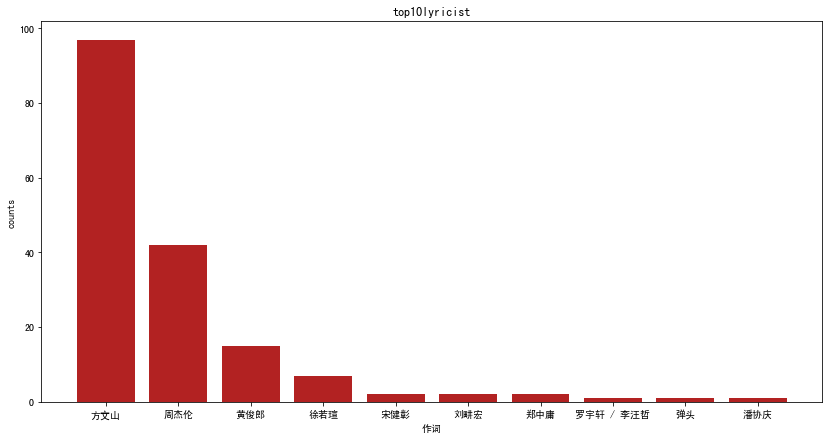

In [67]:
def show_top_lyrist(df, rank = 10):
    plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

    lyricist_counts=df['作词'].value_counts()[:rank].sort_values(ascending=False) #sort values
    作词 = pd.DataFrame(lyricist_counts)
    fig = plt.figure(figsize=(14,7)) #adjust size
    plt.bar(作词.index, 作词.作词, color = '#B22222')
    plt.title('top'+str(rank)+'lyricist') #plot title and label name
    plt.xlabel('作词')
    plt.ylabel('counts')
    plt.savefig('jay_top_lyrist.png',dpi=400)
    plt.show()
show_top_lyrist(df)



## 3.The popularity of Jay Chou's albums can be evaluated by the number of sharing  and the number of comments per album.

In [60]:
pd_df1 = df.groupby(['专辑名'])['分享数'].mean().reset_index().sort_values("分享数",ascending=False)
pd_df2 = df.groupby(['专辑名'])['评论数'].mean().reset_index().sort_values("评论数",ascending=False)
attr = pd_df1.专辑名
v1 = pd_df1.分享数
v2 = pd_df2.评论数
bar = Bar("从评论数和分享数看周杰伦专辑")
bar.add("分享数", attr, v1, mark_line=["average"])
bar.add("评论数", attr, v2, mark_line=["average"])
# plt.savefig('jay_album从评论数和分享数看周杰伦专辑',dpi=400)
bar
# ('jay_sharing.html')
# IFame('jay_sharing.html', width=800, height=400)